<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naive Bayes**

In [5]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20nb.csv')
treino

nb = MultinomialNB()
nb.fit(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])
acuracia_treino = nb.score(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])
acuracia_treino

0.7142857142857143

In [3]:
nublado_tempA_umidA_semvento = pd.DataFrame({
    'previsao':[0],
    'temperatura':[1],
    'umidade':[1],
    'vento':[0]
})

nb.predict(nublado_tempA_umidA_semvento)

array([1])

In [13]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20teste.csv')
teste

,previsao,temperatura,umidade,vento
0,0,1,1,0
1,1,1,1,1
2,0,1,1,0
3,2,0,1,0
4,2,2,0,0
5,2,2,0,1
6,0,2,0,1
7,0,0,1,0
8,0,2,0,0


In [20]:
import numpy as np
y_teste = np.array([0,0,1,1,1,0,1,0,1])
y_teste


array([0, 0, 1, 1, 1, 0, 1, 0, 1])

In [21]:

prev_teste=nb.predict(teste)
prev_teste


array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
prev_teste == y_teste

array([False, False,  True,  True,  True, False,  True, False,  True])

In [26]:

from sklearn.metrics import accuracy_score
acuracia_teste = accuracy_score(y_teste,prev_teste)
acuracia_teste 

0.5555555555555556

[[0 4]
 [0 5]]


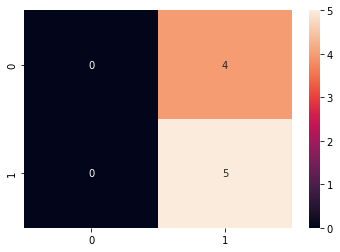

In [24]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)



In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      1.00      0.50         3

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Exercicio Bayes**

In [ ]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
treino.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [ ]:
nb= MultinomialNB()
nb.fit( treino[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']] , treino['Inadimplente'] )

teste = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever2.csv')
teste

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.40
1,0,2,7,9,2.60
2,0,1,7,9,5.80
3,0,1,7,9,4.70
4,0,1,7,9,3.90
5,0,1,8,9,3.25
6,0,1,8,8,7.20
7,1,2,4,3,1.25


In [ ]:
previsoes = nb.predict(teste[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']])
previsoes

array([1, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
matriz = pd.crosstab(teste['Inadimplente'] , previsoes)
matriz

col_0,0,1
Inadimplente,,
0,6,0
1,0,2


In [ ]:
acuracia = sum(teste['Inadimplente'] == previsoes) / len(teste)
acuracia

1.0